# Practice 5A: Logistic Regression
#### wine dataset : classification problem

## (1) Load explore and preprocess (if needed) the dataset. The dataset is accessible also through sklearn

In [1]:
from sklearn.datasets import load_wine
data = load_wine()

In [42]:
## import all necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report 

## (2) Create a binary attribute Class0 that contains a 1 if target contains the value 0, and a 0 otherwise.

In [4]:
df_target_new = pd.DataFrame(np.zeros(len(data.target)), columns=["target"])
df_target_new[data.target==0]=1

## (3) Split the data into training set and test set 80 : 20

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.data, df_target_new.values, random_state=0)

## (4) Perform Logistic Regression on the training set in order to predict Class0 using all the features.

In [6]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

## (5) Compute the training error rate of the model.

In [7]:
y_pred = log_reg.predict(X_train)
confusion_matrix(y_train, y_pred)

array([[90,  0],
       [ 1, 42]])

The model make 1 error over 133 samples in the training set.

## (6) Produce a confusion matrix comparing the true target test values to the predicted target values.

In [8]:
y_pred = log_reg.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[29,  0],
       [ 1, 15]])

## (7) Compute the test error rate.

On the test set, the model makes 1 error over 45 predictions

## (8) Calculate and plot the ROC curve of the trained model and calculate and print the ROC AUC of the model.

Text(0, 0.5, 'TPR (recall)')

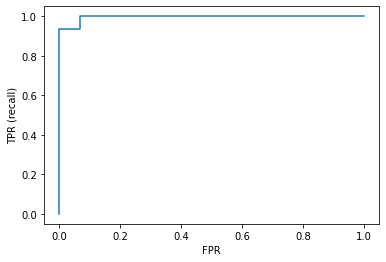

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, log_reg.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, log_reg.decision_function(X_test)) 

print("AUC: {:.3f}".format(rf_auc)) 

AUC: 0.996


The model performs quite well, and the AUC is very near to 1

## (9) Perform a 3-fold Cross Validation (choose an appropriate cross-validation strategy) in order to reliably estimate the performances of the model.

In [14]:
from sklearn.model_selection import StratifiedKFold 
kfold = StratifiedKFold(n_splits=3)
cv_scores = cross_val_score(log_reg, data.data, df_target_new.values, cv=kfold)

print("Cross-validation scores:\n{}".format(cv_scores))
print("average score: {}".format(np.mean(cv_scores)))

Cross-validation scores:
[0.88333333 0.96610169 0.94915254]
average score: 0.9328625235404897


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

The average accuracy of the model with a stratified 3-fold cross validation strategy is 93\%

## (10) Train a Softmax Regression model on the training set in order to predict the original target class, using all the features.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)

In [17]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=10, multi_class='multinomial')

The algorithm does not converge, with the default number of iterations. We might try to increment the number of iterations. However, the features in our dataset are not scaled to the same range of values, hence a good idea would be to preprocess the features first.

In [34]:
df=pd.DataFrame(data=data.data, columns=data.feature_names)

transformer = RobustScaler().fit(df.values)
scaled_data = transformer.transform(df.values)

X_train, X_test, y_train, y_test = train_test_split(scaled_data, data.target, random_state=0, test_size=0.4)

In [35]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=10, multi_class='multinomial')

The features scaling helped the algorithm to converge without incrementing the number of iterations. 

!! IMPORTANT: we should consider scaling the features also for the model built at question 4 (Logistic Regression)

## (11) Produce a confusion matrix comparing the true target test values to the predicted target values. Calculate Precision, Recall and f-score for each class.


In [36]:
# prediciton on the test set
pred_softmax = softmax_reg.predict(X_test)

#calculation of the confusion matrix
confusion = confusion_matrix(y_test, pred_softmax)

In [37]:
print(confusion)

[[22  0  0]
 [ 0 30  1]
 [ 0  1 18]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


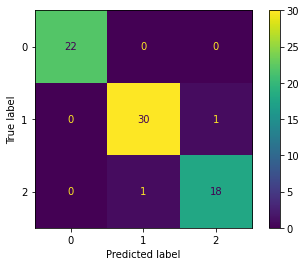

In [39]:
plot_confusion_matrix(softmax_reg, X_test, y_test)  
plt.show()

In [38]:
print(classification_report(y_test, pred_softmax, target_names=data.target_names))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        22
     class_1       0.97      0.97      0.97        31
     class_2       0.95      0.95      0.95        19

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



The model is performing quite well on the test set. It is just malking 2 mistake:
1. predicting class 2 for a test sample belonging to class 1
2. predicting class 1 for a test sample belonging to class 2

This justify the precision of class 1 to be 97%, infact we have 1 FP over 31 predicted positives (precision = 30/(30+1)); and the recall of class 1 is 97% because we have 1 FN over 31 real positive samples (recall = 30/(30+1)). 